In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [3]:
df = pd.read_csv('/content/housing.csv')

#Preparing the dataset

First, keep only the records where ocean_proximity is either <1H OCEAN or INLAND

Preparation:

Fill missing values with zeros.
Apply the log transform to median_house_value.
Do train/validation/test split with 60%/20%/20% distribution.
Use the train_test_split function and set the random_state parameter to 1.
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [5]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
df2 = df[(df['ocean_proximity']=='<1H OCEAN') | (df['ocean_proximity']=='INLAND')]

In [19]:
df2.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
df2.fillna(0, inplace=True)

<ipython-input-20-32f74130add2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


In [21]:
df2['house_value_log'] = np.log1p(df2.median_house_value.values)

<ipython-input-21-698be793eb9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['house_value_log'] = np.log1p(df2.median_house_value.values)


In [41]:
df_train_full, df_test = train_test_split(df2, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train.house_value_log
y_val = df_val.house_value_log
y_test = df_test.house_value_log

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_train['house_value_log']
del df_val['house_value_log']
del df_test['house_value_log']

In [42]:
dv = DictVectorizer(sparse=True)

In [43]:
X_train = dv.fit_transform(df_train[df_train.columns].to_dict(orient='records'))
X_val = dv.transform(df_val[df_val.columns].to_dict(orient='records'))
X_test = dv.transform(df_test[df_test.columns].to_dict(orient='records'))

#Question 1
Let's train a decision tree regressor to predict the median_house_value variable

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [54]:
from sklearn import tree

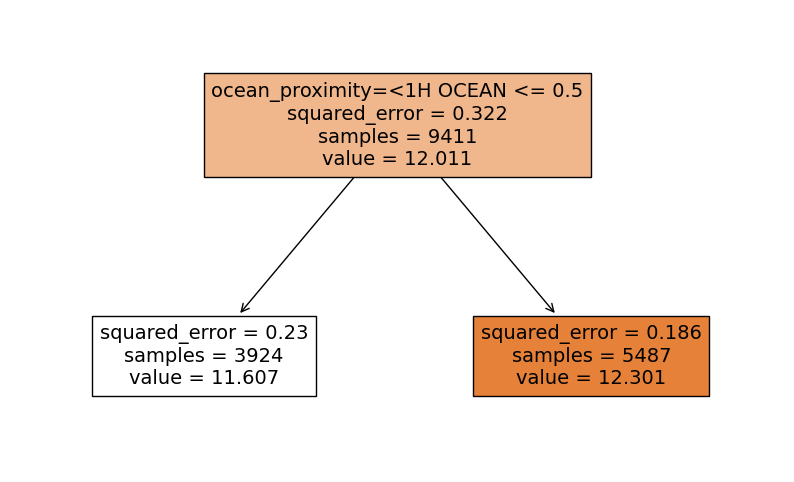

In [55]:
plt.figure(figsize=(10, 6))
tree.plot_tree(model, filled=True, feature_names=dv.get_feature_names_out(input_features=df.columns))
plt.show()

In [58]:
text_representation = tree.export_text(model, feature_names=)
print(text_representation)

ValueError: ignored

#Question 2
Train a random forest model with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)


What's the RMSE of this model on validation?

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [61]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [63]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [64]:
score = rmse(y_val,y_pred)

In [65]:
score

0.24495290030597153

#Question 3
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving?

In [68]:
print("hpa")

hpa


In [71]:

a={}

for i in range(10,200,10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val,y_pred)
    a[i] = score
    print(f"n_estimators:{i} | RMSE: {score:.3f}")

n_estimators:10 | RMSE: 0.245
n_estimators:20 | RMSE: 0.238
n_estimators:30 | RMSE: 0.237
n_estimators:40 | RMSE: 0.235
n_estimators:50 | RMSE: 0.235
n_estimators:60 | RMSE: 0.235
n_estimators:70 | RMSE: 0.234
n_estimators:80 | RMSE: 0.235
n_estimators:90 | RMSE: 0.234
n_estimators:100 | RMSE: 0.234
n_estimators:110 | RMSE: 0.234
n_estimators:120 | RMSE: 0.234
n_estimators:130 | RMSE: 0.234
n_estimators:140 | RMSE: 0.234
n_estimators:150 | RMSE: 0.234
n_estimators:160 | RMSE: 0.233


KeyboardInterrupt: ignored

In [72]:
a

{10: 0.24495290030597153,
 20: 0.23833358987366798,
 30: 0.23650402956159838,
 40: 0.23509490973460043,
 50: 0.23475019819586204,
 60: 0.2345062010902977,
 70: 0.23440154550608353,
 80: 0.23457219159286974,
 90: 0.23447044062017397,
 100: 0.23428380626857082,
 110: 0.23421064634979386,
 120: 0.234022293955548,
 130: 0.23382439576788536,
 140: 0.23366366433540584,
 150: 0.23354802078200426,
 160: 0.23342267954173773}

#Question 4
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1


What's the best max_depth, using the mean RMSE?

In [74]:

for n_est in range(10,200,10):
    for depth in [10,15,20,25]:
        rf = RandomForestRegressor(n_estimators=n_est, random_state=1, n_jobs=-1, max_depth= depth)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_val,y_pred)
        print(f"n_estimators:{n_est} | max_depth: {depth}  | RMSE: {score:.3f}")

n_estimators:10 | max_depth: 10  | RMSE: 0.251
n_estimators:10 | max_depth: 15  | RMSE: 0.246
n_estimators:10 | max_depth: 20  | RMSE: 0.245
n_estimators:10 | max_depth: 25  | RMSE: 0.245
n_estimators:20 | max_depth: 10  | RMSE: 0.247
n_estimators:20 | max_depth: 15  | RMSE: 0.240
n_estimators:20 | max_depth: 20  | RMSE: 0.239
n_estimators:20 | max_depth: 25  | RMSE: 0.239
n_estimators:30 | max_depth: 10  | RMSE: 0.246
n_estimators:30 | max_depth: 15  | RMSE: 0.238
n_estimators:30 | max_depth: 20  | RMSE: 0.237
n_estimators:30 | max_depth: 25  | RMSE: 0.236
n_estimators:40 | max_depth: 10  | RMSE: 0.245
n_estimators:40 | max_depth: 15  | RMSE: 0.236
n_estimators:40 | max_depth: 20  | RMSE: 0.236
n_estimators:40 | max_depth: 25  | RMSE: 0.235
n_estimators:50 | max_depth: 10  | RMSE: 0.245
n_estimators:50 | max_depth: 15  | RMSE: 0.236
n_estimators:50 | max_depth: 20  | RMSE: 0.235
n_estimators:50 | max_depth: 25  | RMSE: 0.235
n_estimators:60 | max_depth: 10  | RMSE: 0.245
n_estimators:

KeyboardInterrupt: ignored

#Question 5

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?

In [80]:
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

feature_names = df_train.columns
feature_importances = model.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: total_bedrooms, Importance: 0.3357
Feature: population, Importance: 0.2925
Feature: housing_median_age, Importance: 0.1019
Feature: total_rooms, Importance: 0.0862
Feature: households, Importance: 0.0738
Feature: latitude, Importance: 0.0302
Feature: median_income, Importance: 0.0268
Feature: ocean_proximity, Importance: 0.0162
Feature: longitude, Importance: 0.0150


In [81]:
feature_importances

array([0.01495348, 0.03019435, 0.10189142, 0.0861758 , 0.33566849,
       0.29247297, 0.07380644, 0.02682069, 0.01624481, 0.02177155])

In [82]:
feature_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

#Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:

In [83]:
import xgboost as xgb
from xgboost import DMatrix

In [84]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [85]:
dtrain = DMatrix(X_train, label=y_train)
dval = DMatrix(X_val, label=y_val)

In [86]:
# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'validation')]

In [87]:
# Train the model with eta = 0.3
num_round = 100
model_eta_0_3 = xgb.train(xgb_params, dtrain, num_round, evals=watchlist)

[0]	train-rmse:0.44350	validation-rmse:0.44250
[1]	train-rmse:0.36599	validation-rmse:0.36916
[2]	train-rmse:0.31556	validation-rmse:0.32382
[3]	train-rmse:0.28541	validation-rmse:0.29965
[4]	train-rmse:0.26573	validation-rmse:0.28417
[5]	train-rmse:0.25338	validation-rmse:0.27463
[6]	train-rmse:0.24157	validation-rmse:0.26770
[7]	train-rmse:0.23486	validation-rmse:0.26423
[8]	train-rmse:0.22668	validation-rmse:0.25820
[9]	train-rmse:0.21995	validation-rmse:0.25444
[10]	train-rmse:0.21444	validation-rmse:0.25179
[11]	train-rmse:0.21155	validation-rmse:0.25054
[12]	train-rmse:0.20729	validation-rmse:0.24791
[13]	train-rmse:0.20317	validation-rmse:0.24628
[14]	train-rmse:0.20135	validation-rmse:0.24630
[15]	train-rmse:0.19858	validation-rmse:0.24522
[16]	train-rmse:0.19580	validation-rmse:0.24445
[17]	train-rmse:0.19333	validation-rmse:0.24395
[18]	train-rmse:0.19107	validation-rmse:0.24284
[19]	train-rmse:0.18735	validation-rmse:0.24127
[20]	train-rmse:0.18524	validation-rmse:0.23978
[2

In [88]:
# Make predictions with the model
y_pred_eta_0_3 = model_eta_0_3.predict(dval)

# Calculate RMSE for eta = 0.3
rmse_eta_0_3 = rmse(y_val, y_pred_eta_0_3)
print(f"RMSE (eta = 0.3): {rmse_eta_0_3:.5f}")

RMSE (eta = 0.3): 0.22862


In [90]:
# Now change eta to 0.1
xgb_params['eta'] = 0.1

# Train the model with eta = 0.1
model_eta_0_1 = xgb.train(xgb_params, dtrain, num_round, evals=watchlist)

# Make predictions with the model
y_pred_eta_0_1 = model_eta_0_1.predict(dval)



[0]	train-rmse:0.52449	validation-rmse:0.52045
[1]	train-rmse:0.48736	validation-rmse:0.48443
[2]	train-rmse:0.45433	validation-rmse:0.45293
[3]	train-rmse:0.42533	validation-rmse:0.42550
[4]	train-rmse:0.39987	validation-rmse:0.40144
[5]	train-rmse:0.37822	validation-rmse:0.38151
[6]	train-rmse:0.35887	validation-rmse:0.36393
[7]	train-rmse:0.34177	validation-rmse:0.34838
[8]	train-rmse:0.32701	validation-rmse:0.33492
[9]	train-rmse:0.31411	validation-rmse:0.32333
[10]	train-rmse:0.30326	validation-rmse:0.31427
[11]	train-rmse:0.29355	validation-rmse:0.30615
[12]	train-rmse:0.28519	validation-rmse:0.29922
[13]	train-rmse:0.27760	validation-rmse:0.29269
[14]	train-rmse:0.27116	validation-rmse:0.28796
[15]	train-rmse:0.26538	validation-rmse:0.28380
[16]	train-rmse:0.26012	validation-rmse:0.27970
[17]	train-rmse:0.25583	validation-rmse:0.27661
[18]	train-rmse:0.25203	validation-rmse:0.27388
[19]	train-rmse:0.24818	validation-rmse:0.27123
[20]	train-rmse:0.24512	validation-rmse:0.26882
[2

In [91]:
# Calculate RMSE for eta = 0.1
rmse_eta_0_1 = rmse(y_val, y_pred_eta_0_1)
print(f"RMSE (eta = 0.1): {rmse_eta_0_1:.5f}")

RMSE (eta = 0.1): 0.23209
